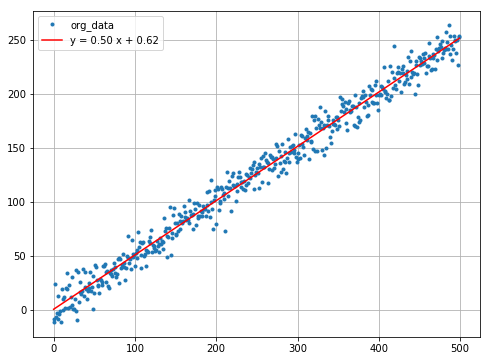

In [45]:
# Linear Regression byusing sklearn.linear_model.LinearRegression()
# Link to LinearRegression() --> 
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Author: YCHEN, Jul 05, 2017, NYU
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import linear_model
%matplotlib inline

N = 500
array_x = np.array(range(N))
linear_y = 0.5*array_x + 1.0 
noice_y = 10*np.array(np.random.randn(N))
array_y = linear_y + noice_y

# Use linear_model.LinearRegression() to fit the data array_x, array_y
reg = linear_model.LinearRegression()
reg.fit(array_x.reshape(-1, 1), array_y.reshape(-1, 1))


dash_x = np.linspace(array_x.min(), array_x.max(), 1000).reshape(-1, 1)
dash_y = reg.coef_*dash_x + reg.intercept_

plt.figure(figsize = (8, 6))
plt.grid(True)

org_data, = plt.plot(array_x, array_y, '.', label= 'org_data')
fit_model, = plt.plot(dash_x, dash_y, color='r', label = 'y = %.2f x + %.2f'%(reg.coef_, reg.intercept_))
plt.legend(handles = [org_data, fit_model])
plt.savefig("xy_plot.jpg", dpi = 96)
